In [34]:
import pandas as pd
import numpy as np

power_profile_durations = {
    "5s Power": 5,
    "1min Power": 60,
    "5min Power": 300,
    "20min Power": 1200,
    "60min Power": 3600
}

In [38]:
mmp_results = {}

# Calculate the MMP for each defined duration
for name, duration_seconds in power_profile_durations.items():
    # Ensure the ride is long enough for the calculation
    if len(points_df) >= duration_seconds:
        # Use a rolling window to calculate the average power over the duration
        rolling_mean = points_df['power'].rolling(window=duration_seconds).mean()
        
        # Find the maximum of those rolling averages
        max_power = rolling_mean.max()
        mmp_results[name] = max_power
    else:
        mmp_results[name] = None # Not enough data for this duration

In [36]:
mmp_results

{'5s Power': 270.8,
 '1min Power': 180.65,
 '5min Power': 141.52666666666667,
 '20min Power': 121.62333333333333,
 '60min Power': None}

In [40]:
# Limit the curve to the length of the ride
max_duration = len(points_df) 
mmp_curve_data = np.zeros(max_duration)

# This loop calculates the max average power for every duration from 1s to max_duration
for i in range(1, max_duration + 1):
    mmp_curve_data[i-1] = points_df['power'].rolling(window=i).mean().max()

# Convert to a DataFrame for easier plotting and analysis
mmp_curve_df = pd.DataFrame({
    'duration_seconds': range(1, max_duration + 1),
    'max_power_watts': mmp_curve_data
})


In [41]:
mmp_curve_df

,duration_seconds,max_power_watts
0,1,292.000000
1,2,292.000000
2,3,288.666667
3,4,277.500000
4,5,270.800000
...,...,...
2541,2542,113.539339
2542,2543,113.494691
2543,2544,113.450079
2544,2545,113.405501


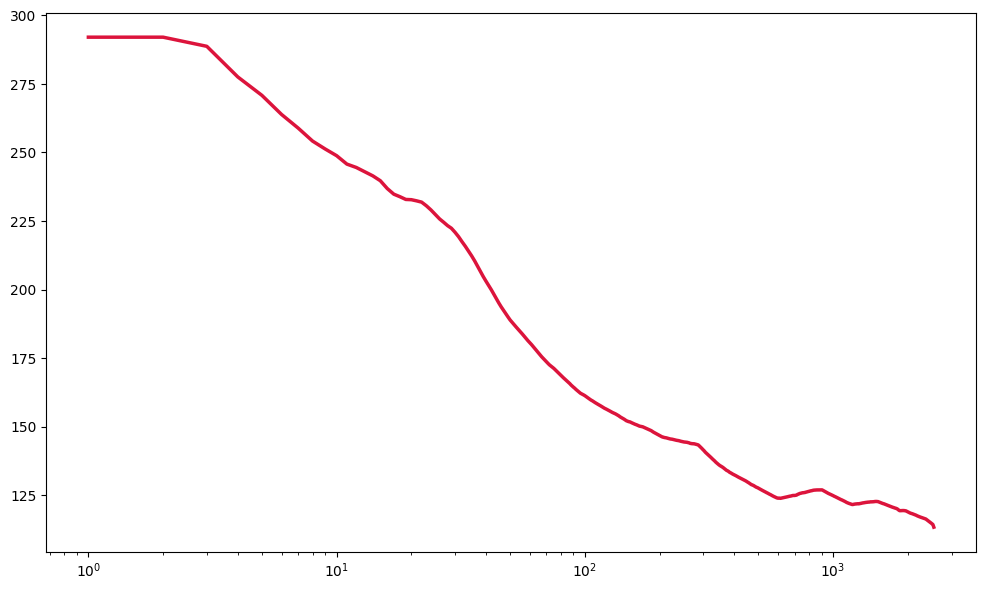

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# --- Step 2: Plot the MMP Curve ---
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the duration vs. power data
ax.plot(
    mmp_curve_df['duration_seconds'], 
    mmp_curve_df['max_power_watts'], 
    color='crimson', 
    linewidth=2.5, 
    label='MMP Curve'
)

# Set the x-axis (time) to a logarithmic scale for better visualization
ax.set_xscale('log')

In [61]:
# --- Step 3: Format the Plot for Clarity ---
ax.set_title('Mean Maximal Power (MMP) Curve', fontsize=18, fontweight='bold')
ax.set_xlabel('Duration', fontsize=14)
ax.set_ylabel('Maximal Power (watts)', fontsize=14)

# Add a grid for easier reading of values
ax.grid(True, which='both', linestyle='--', linewidth=0.6)

# Customize the x-axis ticks to show human-readable time formats
tick_locations = [1, 5, 15, 30, 60, 120, 300, 600, 1200, 3600]
tick_labels = ['1s', '5s', '15s', '30s', '1m', '2m', '5m', '10m', '20m', '60m']

# Apply the custom ticks and labels
ax.xaxis.set_major_locator(mticker.FixedLocator(tick_locations))
ax.xaxis.set_major_formatter(mticker.FixedFormatter(tick_labels))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add a subtle background color
#ax.set_facecolor('#f0f0f0')

# Improve layout to prevent labels from overlapping
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [63]:
# --- Step 4: Save the Figure ---
fig.savefig('mmp_curve_visualization.png', dpi=300)

print("Plotting complete. The MMP curve visualization has been saved as 'mmp_curve_visualization.png'")

Plotting complete. The MMP curve visualization has been saved as 'mmp_curve_visualization.png'


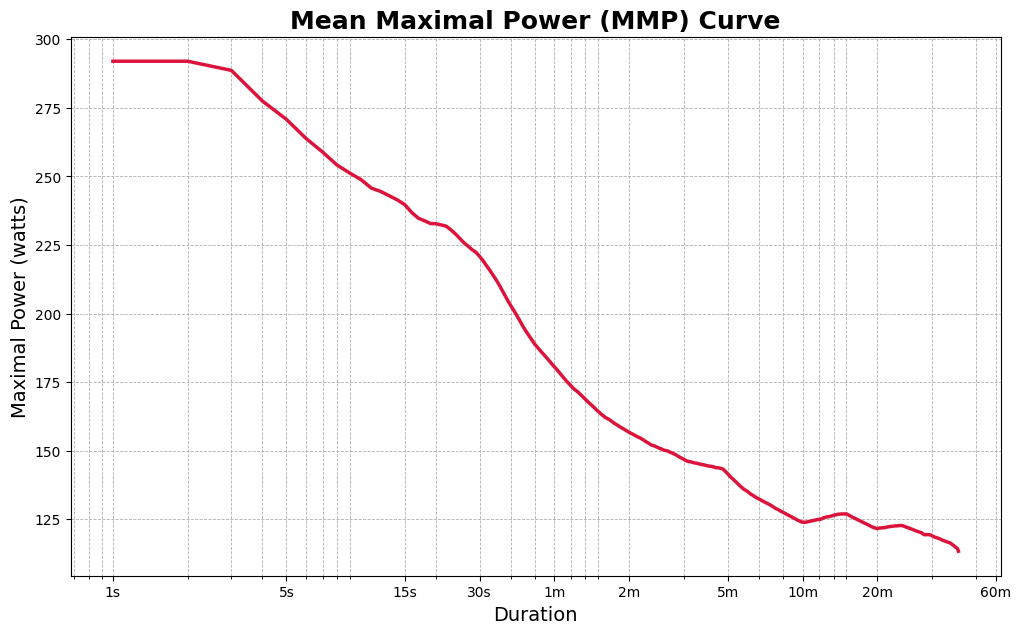

In [62]:
fig

In [32]:
import fitdecode
import src.parse_fit as pf
from datetime import datetime, timedelta
from typing import Dict, Union, Optional,Tuple
import pandas as pd

In [33]:
laps_df, points_df = pf.get_dataframes(filepath)

/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 122); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 164); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 207); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 256)

In [24]:
points_df

,timestamp,lap,altitude,enhanced_altitudelatitude,longitude,position_lat,position_long,lat_gps,long_gps,heart_rate,cadence,speed,enhanced_speed,power,calories
0,NaN,1,NaN,NaN,47.566976,-172769136,567496128,NaN,NaN,73,14,0.833,0.833,28,NaN
1,NaN,1,NaN,NaN,47.566976,-172769056,567496128,NaN,NaN,73,44,1.037,1.037,40,NaN
2,NaN,1,NaN,NaN,47.566976,-172768912,567496128,NaN,NaN,74,49,1.755,1.755,113,NaN
3,NaN,1,NaN,NaN,47.566976,-172768672,567496128,NaN,NaN,74,65,2.347,2.347,113,NaN
4,NaN,1,NaN,NaN,47.566976,-172768416,567496128,NaN,NaN,74,55,2.801,2.801,113,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,NaN,1,NaN,NaN,47.568135,-172780896,567509952,NaN,NaN,100,0,5.005,5.005,0,NaN
2542,NaN,1,NaN,NaN,47.568140,-172781456,567510016,NaN,NaN,100,0,5.141,5.141,0,NaN
2543,NaN,1,NaN,NaN,47.568151,-172782000,567510144,NaN,NaN,100,0,5.308,5.308,0,NaN
2544,NaN,1,NaN,NaN,47.568167,-172782576,567510336,NaN,NaN,98,0,5.493,5.493,0,NaN


In [23]:
laps_df

,start_time,total_distance,total_elapsed_time,max_speed,max_heart_rate,avg_heart_rate
number,,,,,,
1,2025-10-11 06:14:20+00:00,1426.05,300.0,14.662,112,98
2,2025-10-11 06:19:20+00:00,267.48,60.0,10.389,111,105
3,2025-10-11 06:20:20+00:00,1550.18,300.0,14.534,116,107
4,2025-10-11 06:25:20+00:00,1805.67,300.0,14.778,119,114
5,2025-10-11 06:30:20+00:00,1688.44,300.0,14.505,117,108
6,2025-10-11 06:35:20+00:00,1673.81,300.0,14.859,129,115
7,2025-10-11 06:40:20+00:00,1640.03,300.0,14.526,130,110
8,2025-10-11 06:45:20+00:00,2148.25,300.0,15.042,134,119
9,2025-10-11 06:50:20+00:00,119.37,60.0,3.578,130,120


In [2]:
filepath = "data/Aartal_Mud_Gravel.fit"

In [2]:
filepath = "data/mywhoosh 2025-10-12.fit"

In [3]:
all_frames = []
with fitdecode.FitReader(filepath) as fit:
    for frame in fit:
        if frame.frame_type == fitdecode.FIT_FRAME_DATA:
            all_frames += [frame.name]
set(all_frames)

/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 122); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 164); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 207); adding dummy dev data...
  warnings.warn(msg)
/opt/anaconda3/envs/performance/lib/python3.11/site-packages/fitdecode/reader.py:909: UserWarning: 'field "native_field_num" (idx #0) not found in message "field_description"' (local_mesg_num: 0; chunk_offset: 256)

{'activity',
 'developer_data_id',
 'event',
 'field_description',
 'file_creator',
 'file_id',
 'lap',
 'record',
 'session'}

In [19]:
fit

In [18]:
with fitdecode.FitReader(filepath) as fit:
    for frame in fit:
        if frame.frame_type == fitdecode.FIT_FRAME_DATA:
            #if frame.name == "record":
            if frame.name == "session":
            #if frame.name == "lap":
                print(frame.name)
                for field in frame.fields:
                    print(">", field.name)

session
> timestamp
> start_time
> total_timer_time
> total_elapsed_time
> sport
> sub_sport
> total_calories
> num_laps
> total_ascent
> avg_cadence
> avg_heart_rate
> max_cadence
> avg_power
> max_power
> enhanced_avg_speed
> avg_speed
> max_heart_rate
> total_distance
> UUID
> Title
> CurrentRouteId
> IsEvent


In [6]:
COLUMN_NAMES = [
    'timestamp', 'lap', 'altitude', 'enhanced_altitude',
    'latitude', 'longitude', 'position_lat', 'position_long', 'lat_gps', 'long_gps',
    'heart_rate', 'cadence', 'speed', 'power', 'enhanced_speed', 'calories'
]

In [7]:
data = []
lap_no = 1

with fitdecode.FitReader(filepath) as fit:
    for frame in fit:
        if frame.frame_type == fitdecode.FIT_FRAME_DATA:
            if frame.name == "record":
                single_point_data = pf.get_fit_data(frame)
                if single_point_data is not None:
                    single_point_data['lap'] = lap_no
                    data.append(single_point_data)
                    lap_no += 1

df = pd.DataFrame(data, columns=COLUMN_NAMES)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp          2546 non-null   datetime64[ns, UTC]
 1   lap                2546 non-null   int64              
 2   altitude           2546 non-null   float64            
 3   enhanced_altitude  2546 non-null   float64            
 4   latitude           0 non-null      float64            
 5   longitude          0 non-null      float64            
 6   position_lat       2546 non-null   int64              
 7   position_long      2546 non-null   int64              
 8   lat_gps            0 non-null      float64            
 9   long_gps           0 non-null      float64            
 10  heart_rate         2546 non-null   int64              
 11  cadence            2546 non-null   int64              
 12  speed              2546 non-null   float64      

In [10]:
df.head(50)

,timestamp,lap,altitude,enhanced_altitude,latitude,longitude,position_lat,position_long,lat_gps,long_gps,heart_rate,cadence,speed,power,enhanced_speed,calories
0,2025-10-11 06:14:20+00:00,1,0.0,0.0,NaN,NaN,-172769136,567496128,NaN,NaN,73,14,0.833,28,0.833,NaN
1,2025-10-11 06:14:21+00:00,2,0.0,0.0,NaN,NaN,-172769056,567496128,NaN,NaN,73,44,1.037,40,1.037,NaN
2,2025-10-11 06:14:22+00:00,3,0.0,0.0,NaN,NaN,-172768912,567496128,NaN,NaN,74,49,1.755,113,1.755,NaN
3,2025-10-11 06:14:23+00:00,4,0.0,0.0,NaN,NaN,-172768672,567496128,NaN,NaN,74,65,2.347,113,2.347,NaN
4,2025-10-11 06:14:24+00:00,5,0.0,0.0,NaN,NaN,-172768416,567496128,NaN,NaN,74,55,2.801,113,2.801,NaN
5,2025-10-11 06:14:25+00:00,6,0.0,0.0,NaN,NaN,-172768080,567496128,NaN,NaN,76,67,3.145,114,3.145,NaN
6,2025-10-11 06:14:26+00:00,7,0.0,0.0,NaN,NaN,-172767728,567496128,NaN,NaN,76,69,3.403,105,3.403,NaN
7,2025-10-11 06:14:27+00:00,8,0.0,0.0,NaN,NaN,-172767360,567496192,NaN,NaN,79,73,3.606,100,3.606,NaN
8,2025-10-11 06:14:28+00:00,9,0.2,0.2,NaN,NaN,-172766944,567496192,NaN,NaN,81,73,3.765,110,3.765,NaN
9,2025-10-11 06:14:29+00:00,10,0.2,0.2,NaN,NaN,-172766544,567496192,NaN,NaN,81,73,3.894,110,3.894,NaN


In [28]:
df["timestamp"] = df["timestamp"].astype(str)
df.to_excel("data/explore_tabular_data.xlsx")

**To do list**

* convert lat and long values
* check the imputed values on a map - whether they make sense
* merge long and lat values into one integrated metric
* merge speed into one integrated metric
* fill nan values in altitude

In [11]:
df["power"].head(10).values

array([ 28,  40, 113, 113, 113, 114, 105, 100, 110, 110])

In [12]:
from numpy import nan
# input array
array = [nan, nan, 16, 16, nan, 18, 20, nan, nan, 26]
# output array
array = [16, 16, 16, 16, 17, 18, 20, 22, 24, 26]

In [13]:
def fill_nan_values(series: pd.Series):
    # Forward fill NaN values at the beginning
    series.ffill(inplace=True)
    # Backward fill NaN values at the end
    series.bfill(inplace=True)
    # Interpolate NaN values in the middle
    series.interpolate(inplace=True)    
    return series

In [14]:
nav_cols = [
    "latitude", "longitude",
    "position_lat", "position_long", 
    "lat_gps", "long_gps"
]
for col in nav_cols:
    df[col] = fill_nan_values(df[col])

In [15]:
df.head(10)

,timestamp,lap,altitude,enhanced_altitude,latitude,longitude,position_lat,position_long,lat_gps,long_gps,heart_rate,cadence,speed,power,enhanced_speed,calories
0,2025-10-11 06:14:20+00:00,1,0.0,0.0,NaN,NaN,-172769136,567496128,NaN,NaN,73,14,0.833,28,0.833,NaN
1,2025-10-11 06:14:21+00:00,2,0.0,0.0,NaN,NaN,-172769056,567496128,NaN,NaN,73,44,1.037,40,1.037,NaN
2,2025-10-11 06:14:22+00:00,3,0.0,0.0,NaN,NaN,-172768912,567496128,NaN,NaN,74,49,1.755,113,1.755,NaN
3,2025-10-11 06:14:23+00:00,4,0.0,0.0,NaN,NaN,-172768672,567496128,NaN,NaN,74,65,2.347,113,2.347,NaN
4,2025-10-11 06:14:24+00:00,5,0.0,0.0,NaN,NaN,-172768416,567496128,NaN,NaN,74,55,2.801,113,2.801,NaN
5,2025-10-11 06:14:25+00:00,6,0.0,0.0,NaN,NaN,-172768080,567496128,NaN,NaN,76,67,3.145,114,3.145,NaN
6,2025-10-11 06:14:26+00:00,7,0.0,0.0,NaN,NaN,-172767728,567496128,NaN,NaN,76,69,3.403,105,3.403,NaN
7,2025-10-11 06:14:27+00:00,8,0.0,0.0,NaN,NaN,-172767360,567496192,NaN,NaN,79,73,3.606,100,3.606,NaN
8,2025-10-11 06:14:28+00:00,9,0.2,0.2,NaN,NaN,-172766944,567496192,NaN,NaN,81,73,3.765,110,3.765,NaN
9,2025-10-11 06:14:29+00:00,10,0.2,0.2,NaN,NaN,-172766544,567496192,NaN,NaN,81,73,3.894,110,3.894,NaN
